Download the Dataset
Download the Dataset from the following link:
https://www.kaggle.com/binovi/wholesale-customers-data-set

In [40]:
import pandas as pd
import numpy as np

In [41]:
Wholesale = pd.read_csv('Wholesale customers data.csv')

Reading the Dataset
Read the dataset into a Pandas DataFrame!
Does the dataset include any missing values? If so, drop them!
Hint: Pandas can do that with one line of code!

In [42]:
np.where(pd.isnull(Wholesale)) #means no null cell

(array([], dtype=int64), array([], dtype=int64))

In [44]:
Wholesale = Wholesale.dropna()

Feature Selection
Either exclude the Channel and Region from the considered features or think of a way to make them meaningfully impact the analysis.
Hint: Directly using the provided numerical values for Regions is not very wise and can skew the resulting clustering!

In [51]:
selected_X = Wholesale.drop(['Channel', 'Region'], axis = 1).values

In [52]:
selected_X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

Preprocessing
Perform any needed pre-processing on the chosen features including:
Scaling;
Encoding; and
Dealing with Nan values.
Hint: Use only the preprocessing steps you think useful.

In [54]:
from sklearn.preprocessing import StandardScaler
encoded_X = StandardScaler().fit_transform(selected_X)

In [55]:
encoded_X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

Clustering Using K-Means
Use a k-means instance to cluster the data.
Choose different values of k for the K-means algorithm.
Try to visualize the elbow-curve and decide from it the best k and print it.
Clustering Metrics
Print the inertia every time you try a different value for k.

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

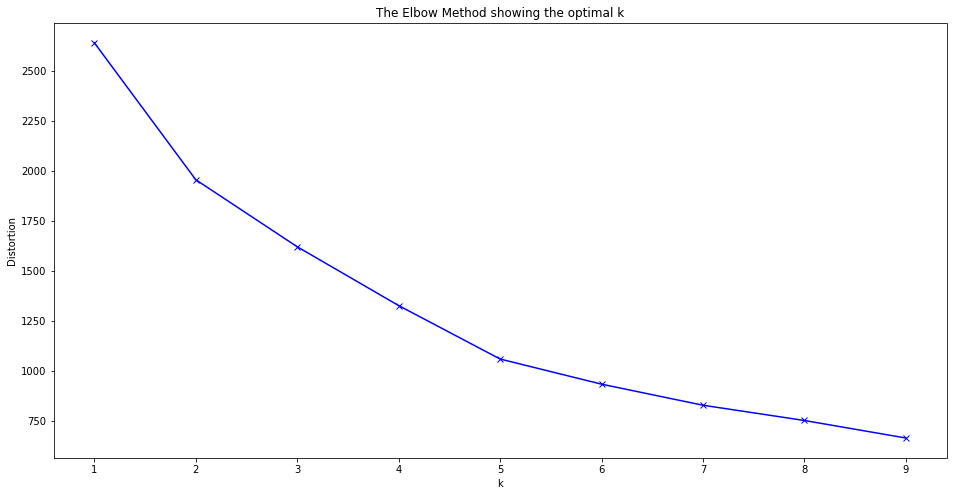

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 
#We can easily run K-Means for a range of clusters using a for loop and 
#collecting the distortions into a list.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(encoded_X)
    distortions.append(kmeanModel.inertia_)
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') #bx- means blue x marker and solid line
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')


In [76]:
#We can observe that the “elbow” is the number 5 which is optimal for this case. 
#Now we can run a K-Means using as n_clusters the number 3.
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(encoded_X)
clusters = kmeanModel.predict(encoded_X)
print(kmeanModel.inertia_)

1058.77125325701
